In [140]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import getpass

In [141]:
user = getpass.getuser()

In [142]:
df_train = pd.read_csv("C:\\Users\\"+user+"\\Desktop\\EDA\\HR\\train.csv")
df_test = pd.read_csv("C:\\Users\\"+user+"\\Desktop\\EDA\\HR\\test.csv")

In [143]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [144]:
df_train.shape

(54808, 14)

In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Handling Null Values

In [146]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

From the above cell, we find that null values are present in education and previous_year_rating columns.

#### Education  -  Categorical 
#### previous_year_rating - Numerical (Float) 


In [147]:
df_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [148]:
education_mode = df_train.education.mode()[0]

In [149]:
education_mode

"Bachelor's"

In general, maximum people starts job after their bachelor's degree. In the dataset also, maximum people's education is Bachelors. Hence, filling education null values with mode value.

In [150]:
df_train['education'] = df_train['education'].fillna(education_mode)

### Filling previous_year_rating null values with random imputation

In [151]:
variable = 'previous_year_rating'

In [152]:
df_train[variable+'_imputation'] = df_train['previous_year_rating']
random = df_train[variable+'_imputation'].dropna().sample(df_train[variable+'_imputation'].isnull().sum(),random_state=0)
random.index = df_train[df_train[variable+'_imputation'].isnull()].index
df_train.loc[df_train[variable+'_imputation'].isnull(),variable+'_imputation'] = random

In [153]:
df_train = df_train.drop(['previous_year_rating'],axis=1)

In [154]:
df_train = df_train.rename(columns={'previous_year_rating_imputation':'previous_year_rating'})

In [155]:
df_train.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
previous_year_rating    False
dtype: bool

In [156]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,60,0,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,50,0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,73,0,3.0


### Dropping employee_id column

In [157]:
# Dropping employee_id column 
df_train = df_train.drop(['employee_id'],axis=1)

In [158]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0,5.0
1,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,60,0,5.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0,3.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,50,0,1.0
4,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,73,0,3.0


In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
 12  previous_year_rating  54808 non-null  float64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [160]:
df_train=df_train.drop(['avg_training_score'],axis=1)

In [161]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,is_promoted,previous_year_rating
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,0,5.0
1,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,0,5.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,0,3.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,0,1.0
4,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,0,3.0


In [162]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

### Univariate Analysis

In [43]:
def univariate(data,variable):
    sb.countplot(data=data,y=variable)
    
def percentage(data,variable):
    ax = sb.countplot(data=data,y=variable)
    total = len(data[variable])
    for p in ax.patches:
        #print(p)
        #print(total)
        percentage = '{:.1f}%'.format((p.get_width()/total)*100)
        x = p.get_x()+p.get_width()+0.02
        y = p.get_y()+p.get_height()-0.4
        #print(x,y)
        ax.annotate(percentage,(x,y))

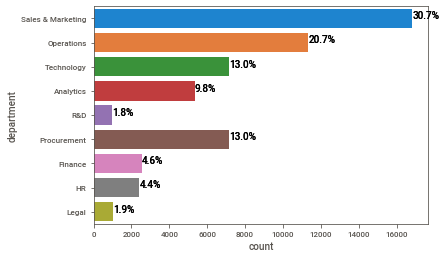

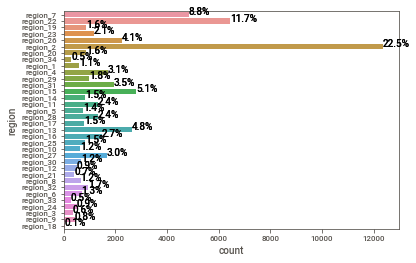

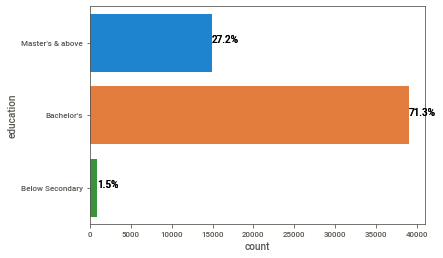

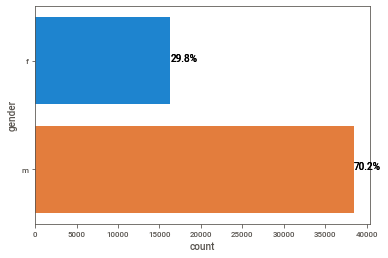

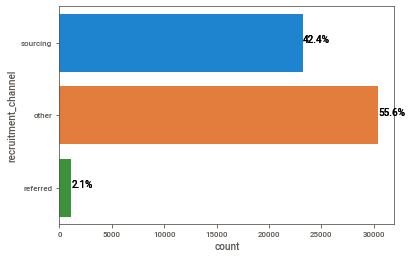

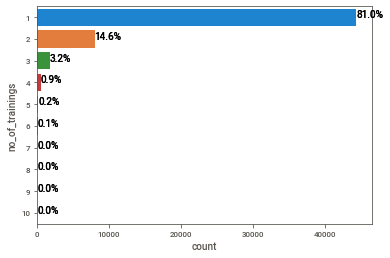

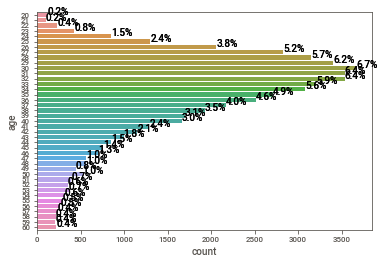

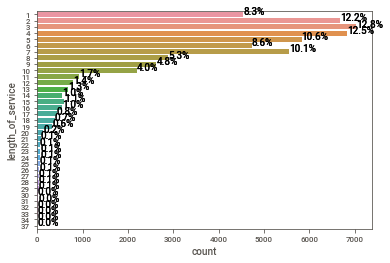

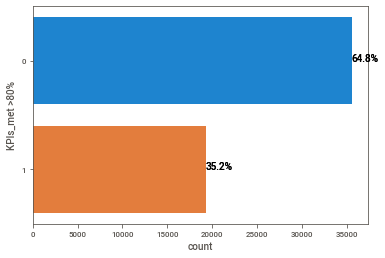

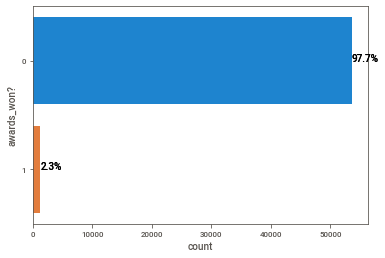

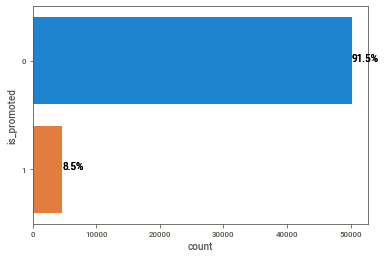

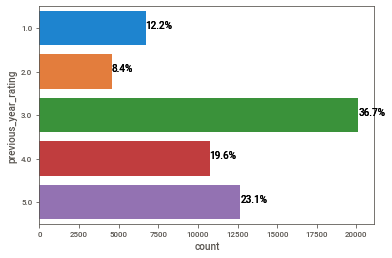

In [100]:
for col in df_train.columns:
    plt.figure()
    univariate(df_train,col)
    percentage(df_train,col)

## BiVariate Analysis

In [101]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,is_promoted,previous_year_rating
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,0,5.0
1,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,0,5.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,0,3.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,0,1.0
4,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,0,3.0


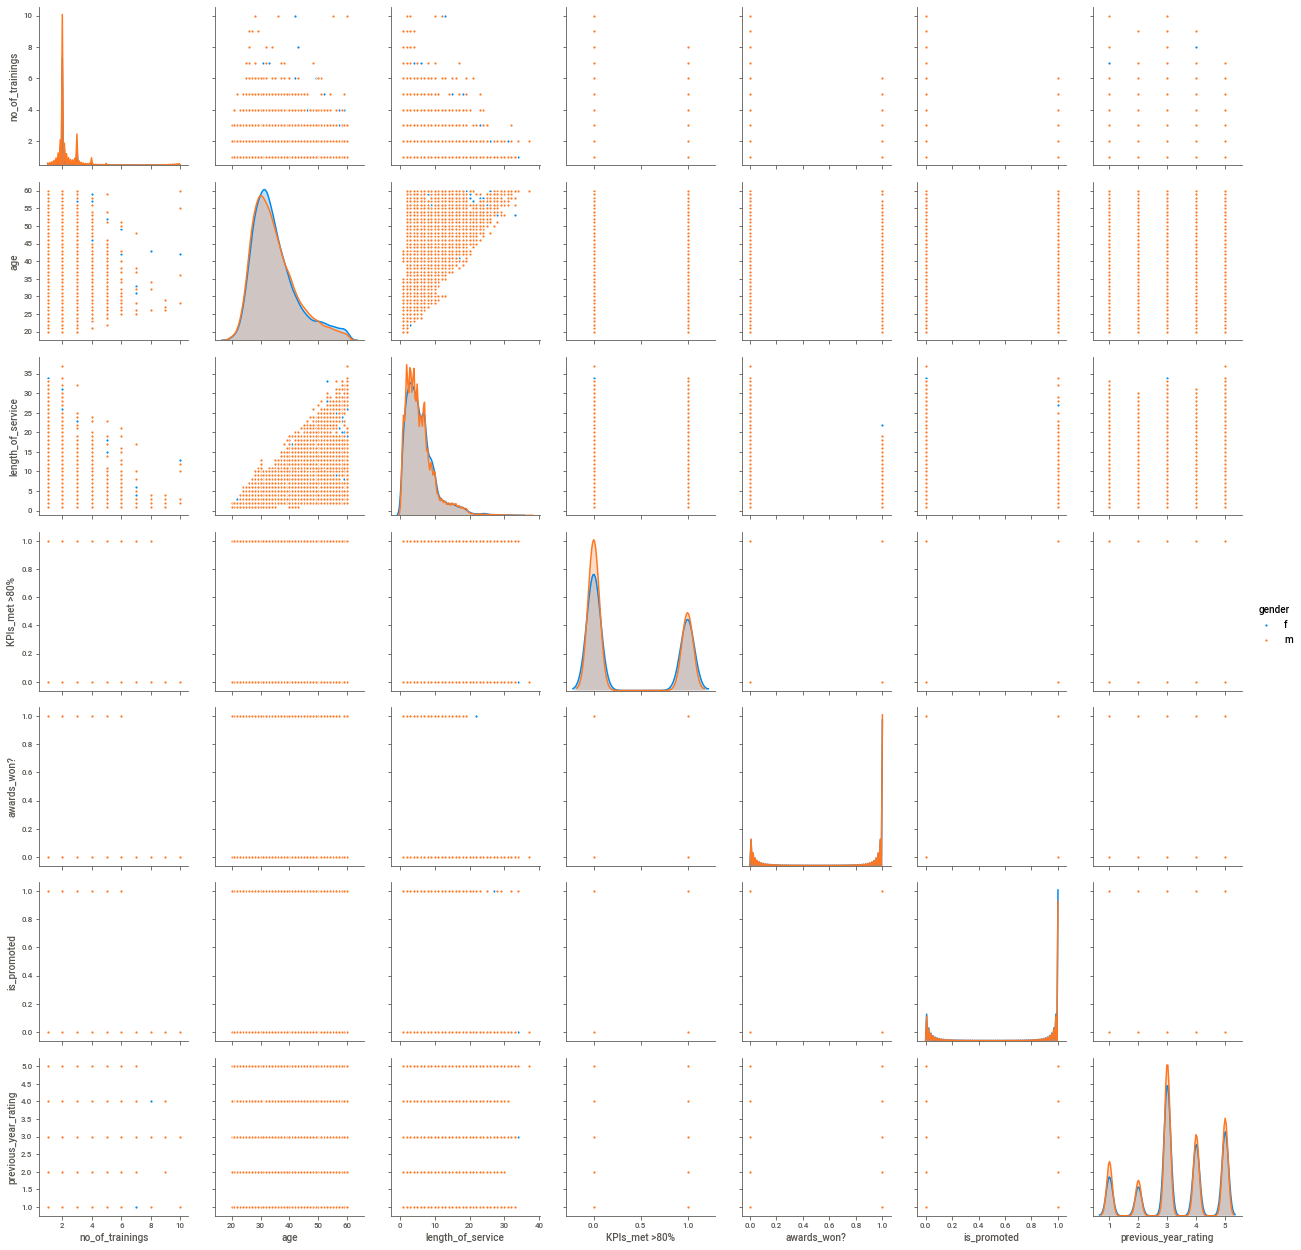

In [134]:
sb.pairplot(data=df_train,hue='gender');

#### Keypoints from the above plot:

1. The age and length_of_service are positively correlated.

2. age and length_of_service are right skewed.


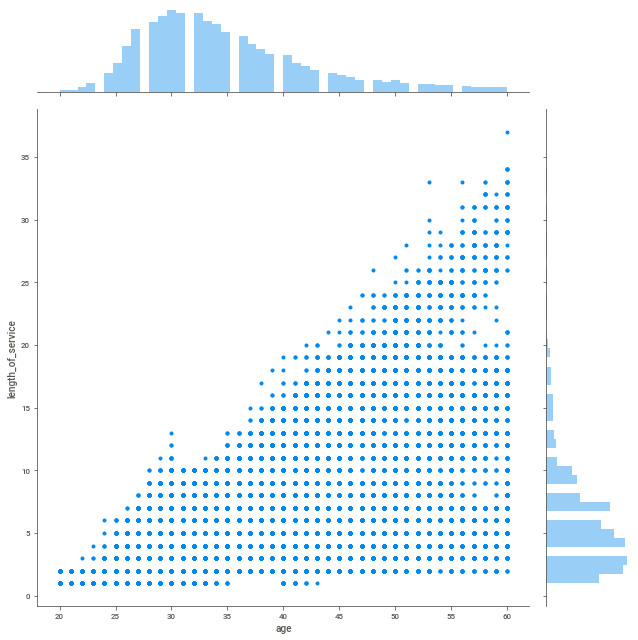

In [118]:
sb.jointplot(data=df_train,x='age',y='length_of_service',height=9)

### MultiVariate Analysis

In [132]:
heat = pd.pivot_table(data=df_train,index='department',columns='region',values='length_of_service')
heat.head(10)

region,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
department,,,,,,,,,,,,,,,,,,,,,
Analytics,4.842105,4.730769,4.898438,3.189189,5.150376,5.208333,4.982906,4.898305,3.307692,NaN,...,4.500000,3.687500,5.000000,4.063830,6.125926,5.469388,4.803922,5.994859,3.458333,3.783133
Finance,3.571429,3.846154,3.964912,4.600000,4.367816,4.521739,4.210526,4.962963,2.000000,NaN,...,3.935065,4.281250,6.500000,3.333333,5.700000,4.090909,3.136364,4.950000,3.157895,3.777778
HR,3.000000,4.933333,4.414634,3.444444,4.783133,5.625000,5.850746,3.702703,3.789474,NaN,...,4.418919,4.584615,4.500000,1.750000,5.413043,5.500000,3.750000,5.894068,3.583333,NaN
Legal,6.000000,NaN,3.590909,1.916667,3.781250,NaN,4.777778,3.000000,3.666667,NaN,...,4.272727,2.100000,NaN,2.875000,3.545455,2.611111,3.000000,5.420000,5.500000,4.333333
Operations,4.590164,5.942529,5.733096,4.529412,6.729630,6.453125,7.005181,6.367347,5.021739,3.666667,...,5.685096,5.268551,7.434783,4.626866,6.771368,4.552632,4.543750,6.463801,4.815900,4.176471
Procurement,3.888889,5.559211,5.827586,4.951613,6.129412,5.288136,6.805556,5.325123,7.406877,NaN,...,5.198980,5.769231,5.076923,5.378378,6.811518,5.059701,3.684211,6.460624,4.973684,2.533333
R&D,NaN,4.000000,4.148936,2.000000,5.730769,5.500000,4.129032,4.100000,3.000000,NaN,...,4.466667,3.100000,NaN,NaN,6.220588,4.000000,3.500000,5.042553,3.294118,5.000000
Sales & Marketing,4.989101,5.991489,5.490338,4.101124,6.412784,6.015576,5.761337,5.875874,5.935135,4.178571,...,5.300161,4.130282,6.077922,4.190476,6.862637,5.990950,4.626866,6.459403,4.729730,3.967078
Technology,4.342466,5.559322,4.847682,3.675676,6.283208,6.140187,6.242009,5.507937,5.588235,NaN,...,5.031250,4.083333,7.661765,4.444444,5.847826,4.991803,3.876404,6.150124,4.642857,3.875000


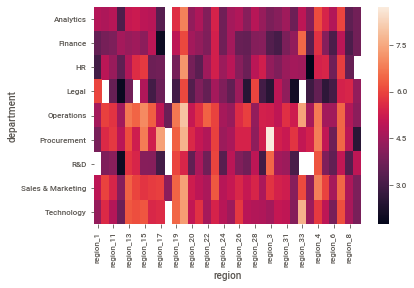

In [133]:
sb.heatmap(heat)

### Keypoints:

1. Looks like in region-17, maximum experienced employees are present.